In [1]:
import os.path
from scipy import *
from scipy import integrate as integrate
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 1000)

In [2]:
def Gauss(omega, sigma, mu, cellAve = True):
    xCell = omega.xCell
    xNode = omega.xNode
    nh = omega.nh[::-1][0]
    if (cellAve):
        x = np.asarray(sorted(set(np.append(xNode, xCell))))
    else:
        x = xCell
    gauss = np.exp(-((x - mu)**2) / (2. * (sigma**2)))
    if (cellAve):
        gauss = Simps(gauss)
    return gauss

In [3]:
def FourierCoefs(omega, waveform, waves):
    dx = omega.dx[0]
    norm = LA.inv(waves.transpose() @ waves)
    FCoefs = waveform.transpose() @ waves @ norm #  (waveform * waves.transpose()).transpose()
    # FCoefs = np.trapz(integrand, axis = 0, dx = dx)
    return FCoefs

In [4]:
def Simps(f):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
#     dx = omega.dx[0]
#     print(np.shape(f[0:-1:2]))
#     print(np.shape(f[0::2]))
#     print(np.shape(f[2::2]))
    # S = np.trapz(f, axis = 0, dx = dx)
    S = (1. / 6.) * (f[0:-1:2] + (4 * f[1::2]) + f[2::2])
    return S

In [5]:
omega = BT.Grid(64)
waves = WT.MakeWaves(omega)
xCell = omega.xCell
xNode = omega.xNode
nh = omega.nh[::-1][0]
x = np.asarray(sorted(set(np.append(xNode, xCell))))
nh = omega.nh[::-1][0]

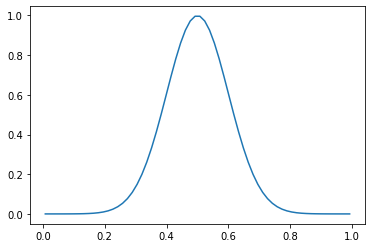

In [6]:
sigma = 0.1
mu = 0.5
gauss = Gauss(omega, sigma, mu)
# gauss = waves[:, 60]
plt.figure()
plt.plot(xCell, gauss)
plt.show()

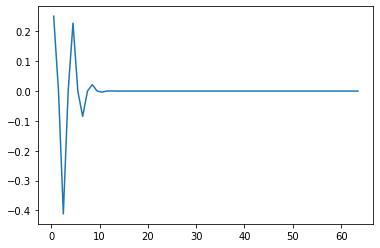

[ 2.50662684e-01  1.34096859e-16 -4.11522844e-01 -1.38486420e-17  2.27622116e-01  7.26005011e-17 -8.48370831e-02 -4.74035933e-18  2.13058080e-02 -2.94229603e-17 -3.60576272e-03 -4.53961523e-17  4.10950266e-04  3.36417232e-17 -3.17614048e-05 -3.41857120e-17  1.48506658e-06  1.61638268e-17 -1.90034864e-07 -8.94163011e-17 -1.16049914e-07 -8.29872389e-17 -1.03789102e-07 -3.23023910e-17 -9.19108061e-08  1.34083171e-16 -8.16063876e-08 -1.20084274e-16 -7.26399783e-08 -2.05998172e-16 -6.48137241e-08 -4.34034294e-18 -5.79515112e-08  1.15968531e-16 -5.19003383e-08  2.77033779e-16 -4.65289394e-08  5.81332554e-17 -4.17252995e-08 -1.18963638e-16 -3.73938647e-08 -1.27205002e-16 -3.34528085e-08 -3.50506414e-16 -2.98315426e-08 -3.83322172e-16 -2.64685157e-08  2.12188628e-16 -2.33092851e-08  3.82413069e-16 -2.03048485e-08  2.38193110e-16 -1.74101545e-08 -4.27287096e-17 -1.45827757e-08 -1.08980978e-16 -1.17816655e-08  2.76814015e-16 -8.96596869e-09  3.05290950e-16 -6.09382082e-09  3.19626082e-17
 -3.121

/Users/sashacurcic/anaconda3/lib/python3.7/site-packages/numpy/lib/index_tricks.py:861: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val


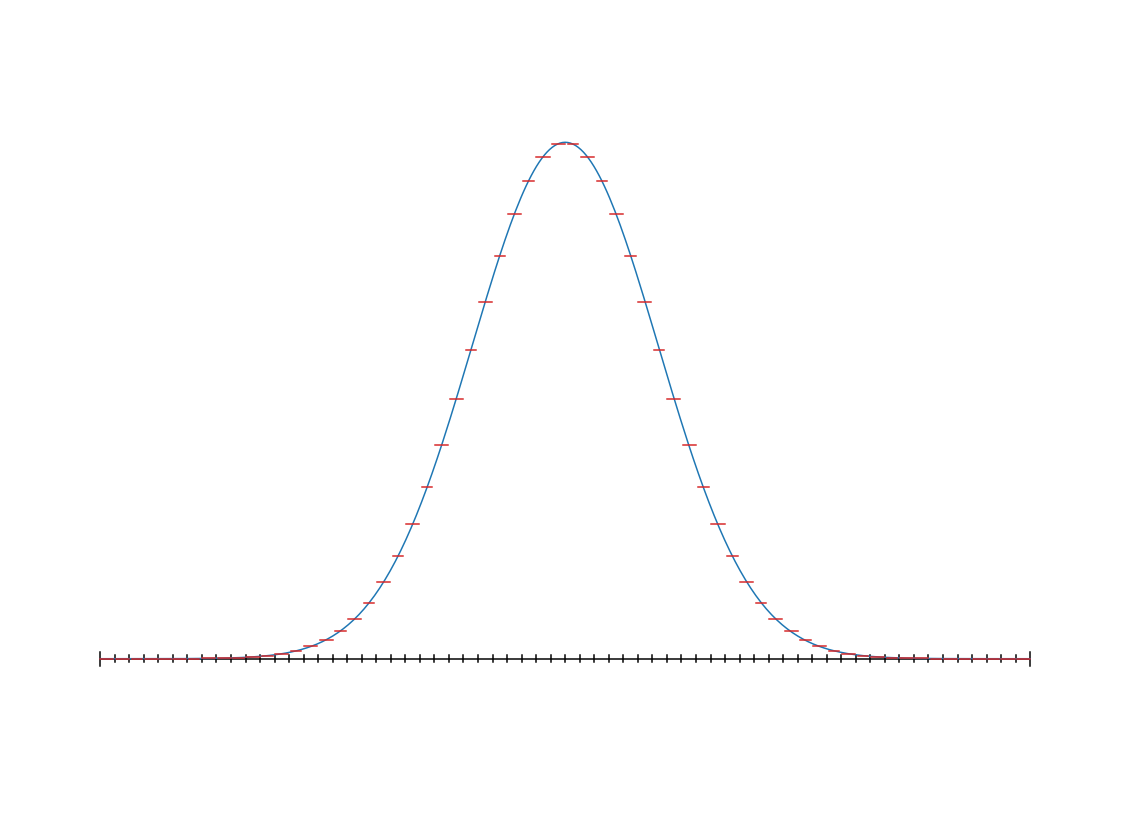

In [7]:
FCoefs = FourierCoefs(omega, gauss, waves)
plt.figure()
plt.plot(64*xCell, FCoefs)
plt.show()


print(FCoefs)
PT.PlotMixedWave(omega, waves, FCoefs, rescale = [4, 6])
c = 1.
t = 0.4

ks = np.asarray(WT.MakeKs(nh), float)
KCoefs = FFTT.GetKSpaceCoefs(omega, FCoefs, waves)
# print(KCoefs)


# print(ks)
# CosFunc = np.cos(-2j * np.pi * c * t) * np.ones(nh, float)
# print(CosFunc)
# KCoefsShift = np.exp(-2j * np.pi * c * t * ks) * KCoefs




[ 1.        +0.j          0.54030231+0.84147098j  0.54030231+0.84147098j -0.41614684+0.90929743j -0.41614684+0.90929743j -0.9899925 +0.14112001j -0.9899925 +0.14112001j -0.65364362-0.7568025j  -0.65364362-0.7568025j   0.28366219-0.95892427j  0.28366219-0.95892427j  0.96017029-0.2794155j   0.96017029-0.2794155j   0.75390225+0.6569866j   0.75390225+0.6569866j  -0.14550003+0.98935825j -0.14550003+0.98935825j -0.91113026+0.41211849j -0.91113026+0.41211849j -0.83907153-0.54402111j -0.83907153-0.54402111j  0.0044257 -0.99999021j  0.0044257 -0.99999021j  0.84385396-0.53657292j  0.84385396-0.53657292j  0.90744678+0.42016704j  0.90744678+0.42016704j  0.13673722+0.99060736j  0.13673722+0.99060736j -0.75968791+0.65028784j -0.75968791+0.65028784j -0.95765948-0.28790332j -0.95765948-0.28790332j -0.27516334-0.96139749j -0.27516334-0.96139749j  0.66031671-0.75098725j  0.66031671-0.75098725j  0.98870462+0.14987721j  0.98870462+0.14987721j  0.40808206+0.91294525j  0.40808206+0.91294525j
 -0.54772926+0.

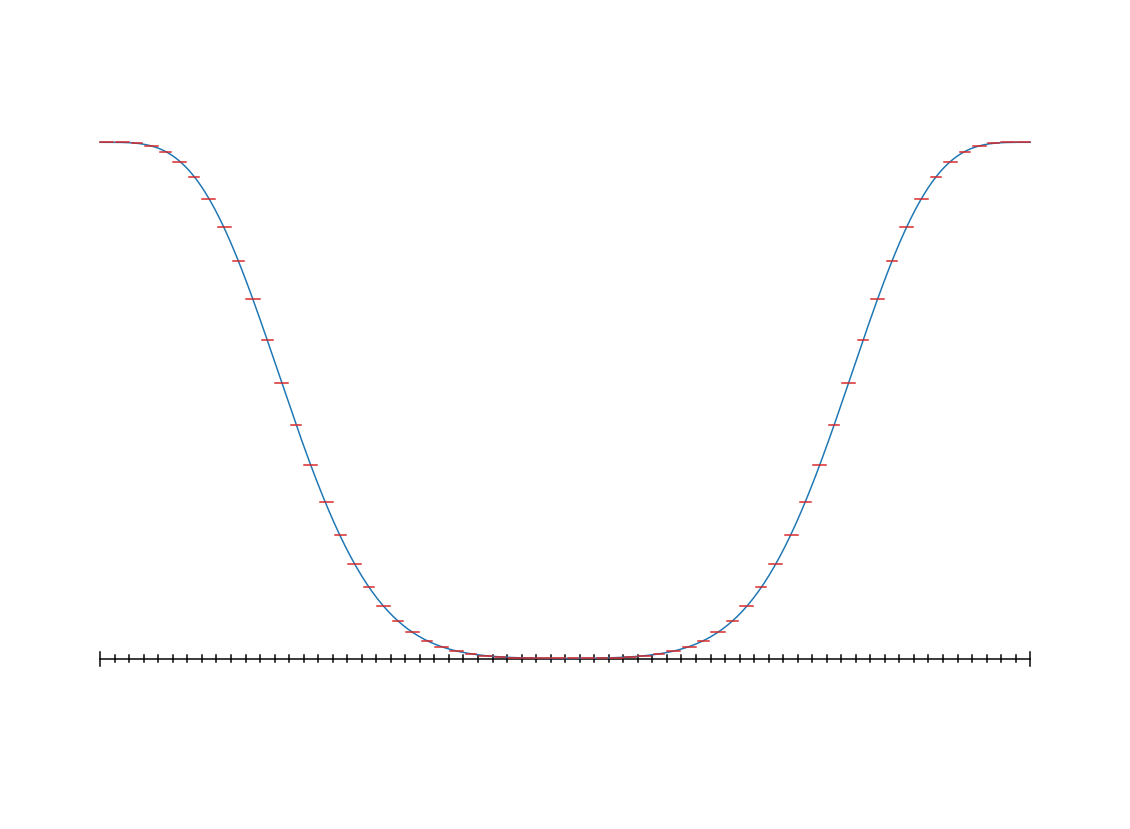

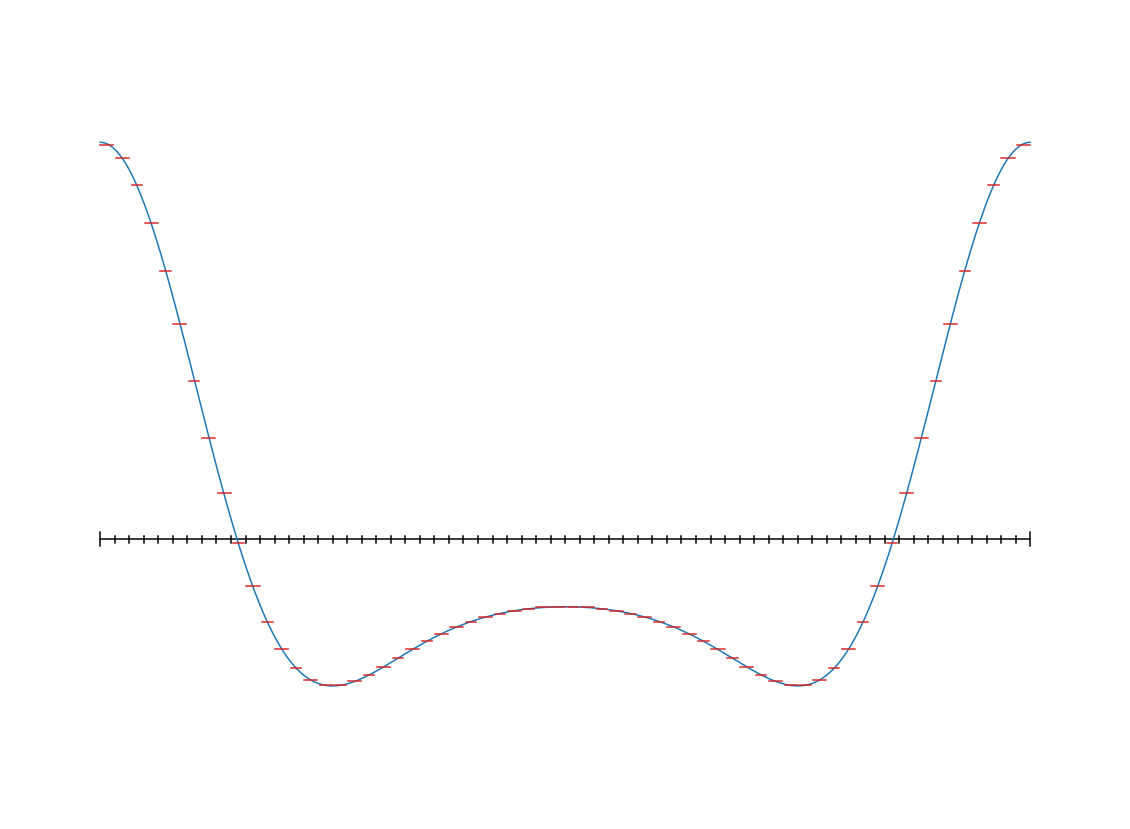

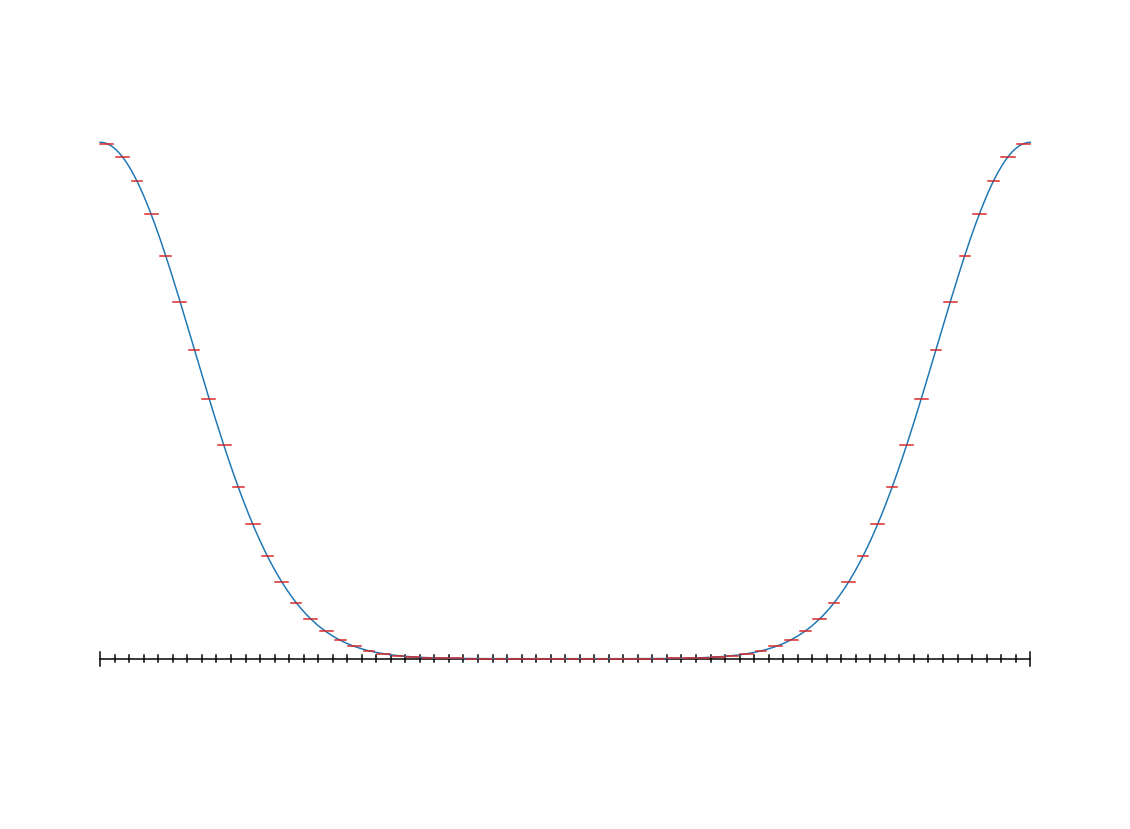

In [8]:
shift1 = np.exp(-2j * np.pi * c * t * ks)
propagated = shift1 * FCoefs
# PT.PlotMixedWave(omega, waves, np.abs(propagated), rescale = [4, 6])
shift2 = np.exp(1j * ks)
propagated2 = shift2 * propagated
print(shift2)
print(propagated)
print(propagated2)
PT.PlotMixedWave(omega, waves, np.real(propagated), rescale = [4, 6])
PT.PlotMixedWave(omega, waves, np.imag(propagated), rescale = [4, 6])
PT.PlotMixedWave(omega, waves, np.abs(propagated), rescale = [4, 6])

/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/PlotTools.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  cellVals[lowIndex:highIndex] = pieces[k] * cellVals[lowIndex:highIndex]
/Users/sashacurcic/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/sashacurcic/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:923: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


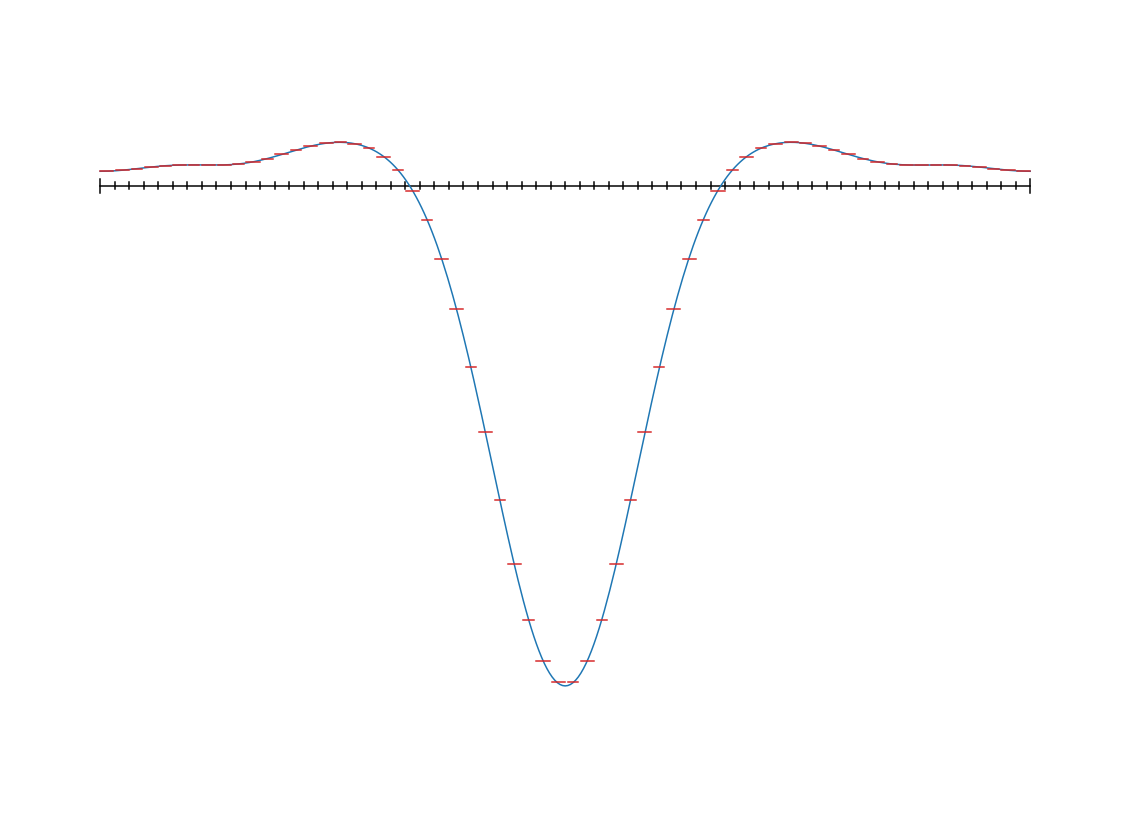

In [9]:
shift = FFTT.PerformIFFT(np.exp(-2j * np.pi * c * t * ks)) # FFTT.GetXSpaceCoefs(omega, shift * KCoefs, waves)
PT.PlotMixedWave(omega, waves, shift * FCoefs, rescale = [4, 6])

print(waves[:, 0])

In [10]:
A = np.arange(64).reshape(8, 8)
B = np.ones((8, 8), float)
C = np.arange(8)
D = (C * B.transpose()).transpose()
print(C)
print('')
print(C[0:-1:2])
print('')
print(C[1::2])
print('')
print(A[:3])
print(np.trapz(A[:3], axis = 0))
print(C*C)

[0 1 2 3 4 5 6 7]

[0 2 4 6]

[1 3 5 7]

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
[16. 18. 20. 22. 24. 26. 28. 30.]
[ 0  1  4  9 16 25 36 49]


In [11]:
A = np.zeros((nh, nh), float)
cosines = np.cos(2 * np.pi * ks * c * t)
sines = np.sin(2 * np.pi * ks * c * t)
np.fill_diagonal(A, 2)#cosines)
np.fill_diagonal(A[:, 1:], -3)#-sines[:-1])
np.fill_diagonal(A[1:], 3)#sines[:-1])
print(A[:8, :8])

[[ 2. -3.  0.  0.  0.  0.  0.  0.]
 [ 3.  2. -3.  0.  0.  0.  0.  0.]
 [ 0.  3.  2. -3.  0.  0.  0.  0.]
 [ 0.  0.  3.  2. -3.  0.  0.  0.]
 [ 0.  0.  0.  3.  2. -3.  0.  0.]
 [ 0.  0.  0.  0.  3.  2. -3.  0.]
 [ 0.  0.  0.  0.  0.  3.  2. -3.]
 [ 0.  0.  0.  0.  0.  0.  3.  2.]]


[[0 1]
 [2 3]]
[[ 1.  0.]
 [-0.  1.]]
[[ 1.          0.          0.         ...  0.          0.          0.        ]
 [ 0.         -0.80901699  0.58778525 ...  0.          0.          0.        ]
 [ 0.         -0.58778525 -0.80901699 ...  0.          0.          0.        ]
 ...
 [ 0.          0.          0.         ... -0.80901699  0.58778525  0.        ]
 [ 0.          0.          0.         ... -0.58778525 -0.80901699  0.        ]
 [ 0.          0.          0.         ...  0.          0.         -0.95105652]]
(64, 64)


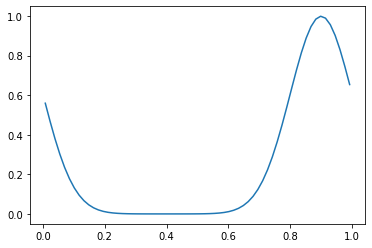

In [12]:
A = np.arange(4)# .reshape(2, 2)
B = np.asarray([0, 1, 2, 3]).reshape(2, 2)
print(B)
cosine = lambda k: np.cos(2. * np.pi * k * c * t)
sine = lambda k: np.sin(2. * np.pi * k * c * t)
rotMat = lambda k: np.asarray([cosine(k), sine(k), -sine(k), cosine(k)]).reshape(2, 2)
print(rotMat(0))
rotMats = [rotMat(k) for k in range(int(nh / 2) + 1)]
shift = LA2.block_diag(*rotMats)[1:-1, 1:-1]
shift[0, 0] = cosine(0)
shift[::-1, ::-1][0, 0] = sine(nh / 2)
# shift = shift.transpose()
print(shift)
print(np.shape(shift))
fig = plt.figure()
plt.plot(xCell, waves @ (shift @ FCoefs))
# fig.savefig('/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/ShiftedGauss' + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)
plt.show()

This image has been saved under /Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/MixedWave.


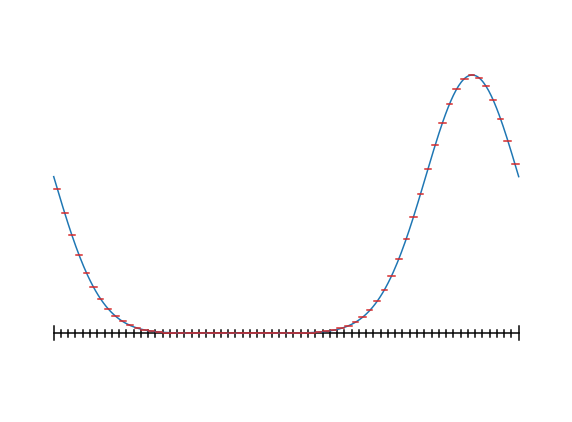

In [13]:
PT.PlotMixedWave(omega, waves, shift @ FCoefs, rescale = [2, 3], save = True)